In [101]:
import pandas as pd

In [2]:
listings = pd.read_csv('listings.csv')
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [3]:
rev = pd.read_csv('reviews.csv')
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [102]:
rev.iloc[0][5]

"My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it was last minute ;) i do recommand this place to any airbnb user :)"

In [103]:
calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


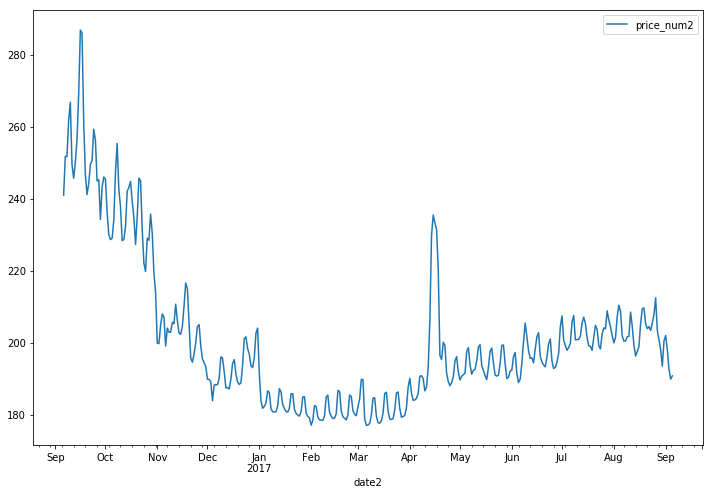

In [153]:
pd.DataFrame(calendar[calendar.price.notnull()].groupby('date2').price_num2.mean()).reset_index().plot('date2', 'price_num2', kind = 'line', figsize = (12, 8));

In [167]:
listings.groupby('neighbourhood').

In [176]:
import seaborn as sns

In [178]:
base_color = sns.color_palette()[0]

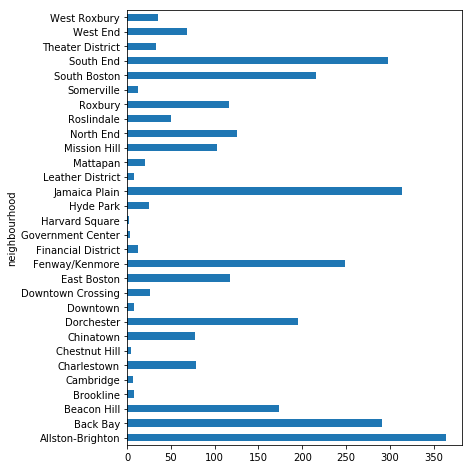

In [180]:
listings.groupby('neighbourhood').id.size().plot(kind = 'barh', color = base_color, figsize = (6, 8));

In [215]:
import matplotlib.pyplot as plt

In [219]:
calendar = pd.merge(left = calendar, right = listings[['id', 'neighbourhood']], right_on = 'id', left_on = 'listing_id', how = 'left')

In [222]:
calendar.drop(['date', 'price', 'price_num', 'price2'], axis = 1, inplace = True)

In [225]:
calendar = calendar.rename(columns= {'date2':'date',
                         'price_num2':'price'})

In [227]:
calendar.available = np.where(calendar.available == 't', True, False)

In [230]:
calendar.head()

,listing_id,available,price,date,dayname,id,neighbourhood
0,12147973,False,NaN,2017-09-05,Tuesday,12147973,Roslindale
1,12147973,False,NaN,2017-09-04,Monday,12147973,Roslindale
2,12147973,False,NaN,2017-09-03,Sunday,12147973,Roslindale
3,12147973,False,NaN,2017-09-02,Saturday,12147973,Roslindale
4,12147973,False,NaN,2017-09-01,Friday,12147973,Roslindale


In [234]:
df = calendar[calendar.available == True].groupby(['neighbourhood', 'date']).price.mean().reset_index()

In [243]:
df.head()

,neighbourhood,date,price
0,Allston-Brighton,2016-09-06,162.600000
1,Allston-Brighton,2016-09-07,148.072464
2,Allston-Brighton,2016-09-08,146.974359
3,Allston-Brighton,2016-09-09,150.342857
4,Allston-Brighton,2016-09-10,152.471429


In [252]:
hoods = df.neighbourhood.unique().tolist()
hoods

['Allston-Brighton',
 'Back Bay',
 'Beacon Hill',
 'Brookline',
 'Cambridge',
 'Charlestown',
 'Chestnut Hill',
 'Chinatown',
 'Dorchester',
 'Downtown',
 'Downtown Crossing',
 'East Boston',
 'Fenway/Kenmore',
 'Financial District',
 'Government Center',
 'Harvard Square',
 'Hyde Park',
 'Jamaica Plain',
 'Leather District',
 'Mattapan',
 'Mission Hill',
 'North End',
 'Roslindale',
 'Roxbury',
 'Somerville',
 'South Boston',
 'South End',
 'Theater District',
 'West End',
 'West Roxbury']

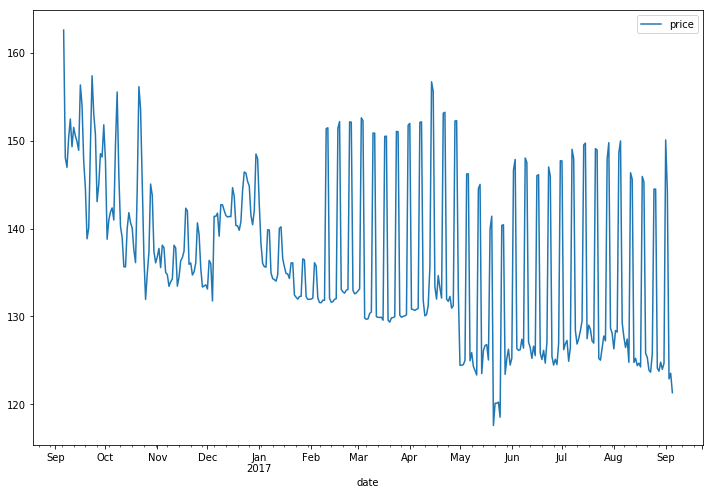

In [251]:
df[df.neighbourhood == 'Allston-Brighton'].plot('date', 'price', kind = 'line', figsize = (12, 8));

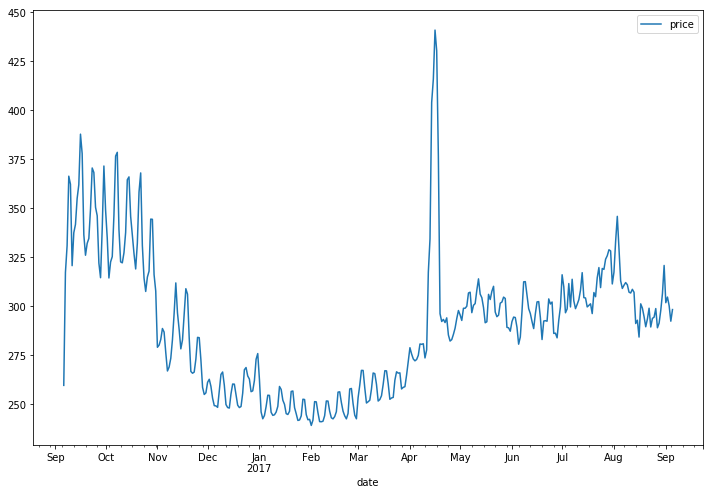

In [253]:
df[df.neighbourhood == 'Back Bay'].plot('date', 'price', kind = 'line', figsize = (12, 8));

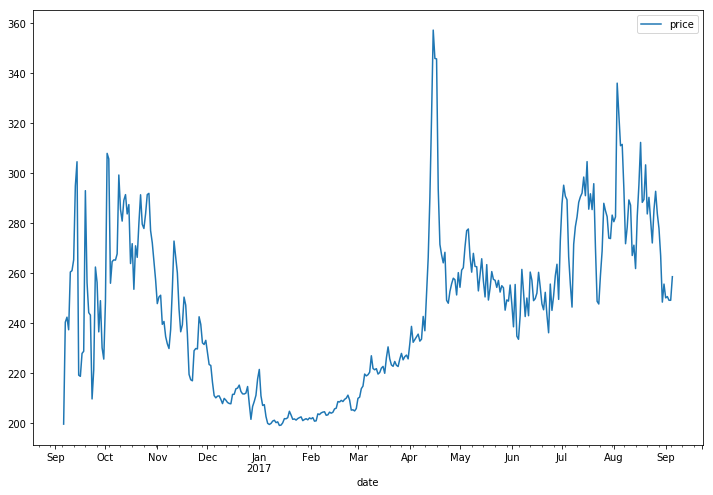

In [254]:
df[df.neighbourhood == 'Beacon Hill'].plot('date', 'price', kind = 'line', figsize = (12, 8));

C:\Users\ilknur\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ilknur\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


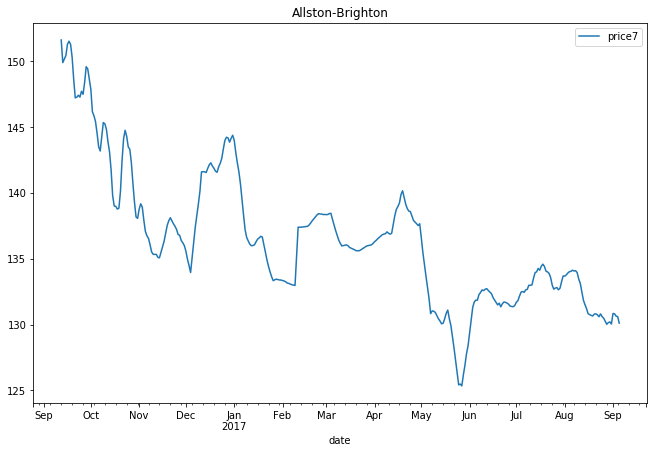

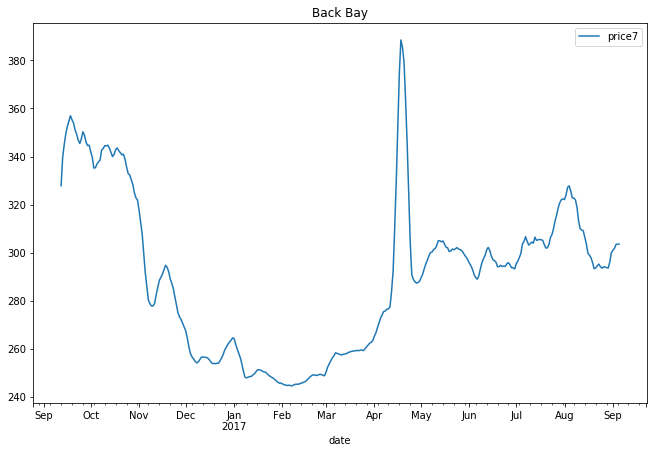

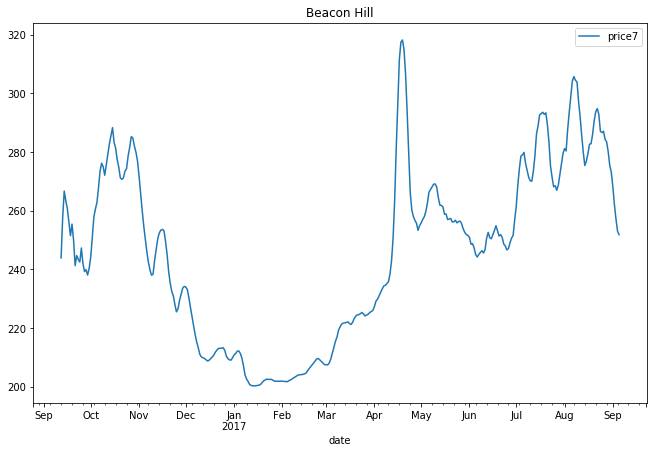

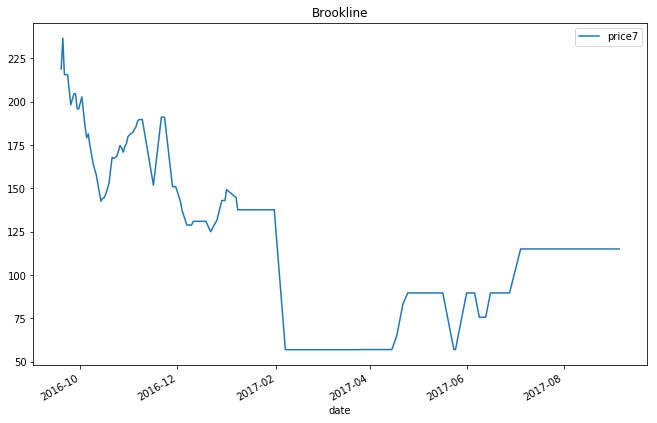

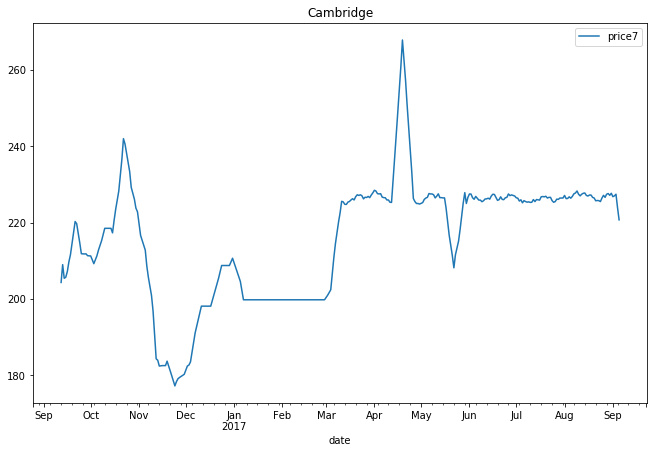

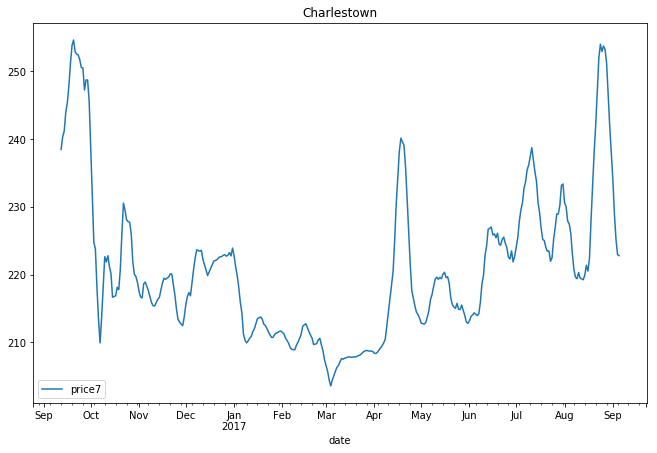

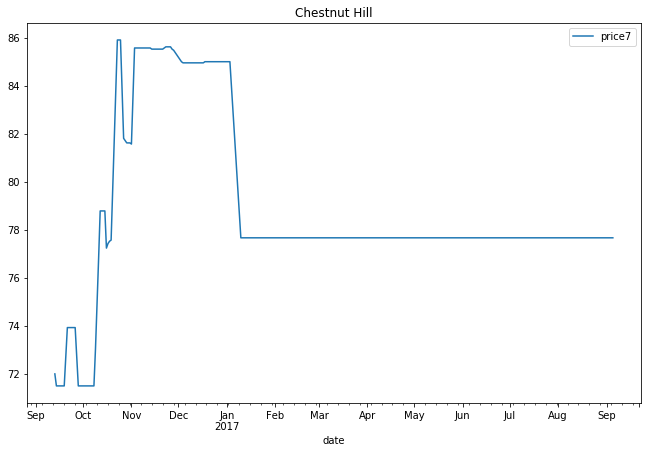

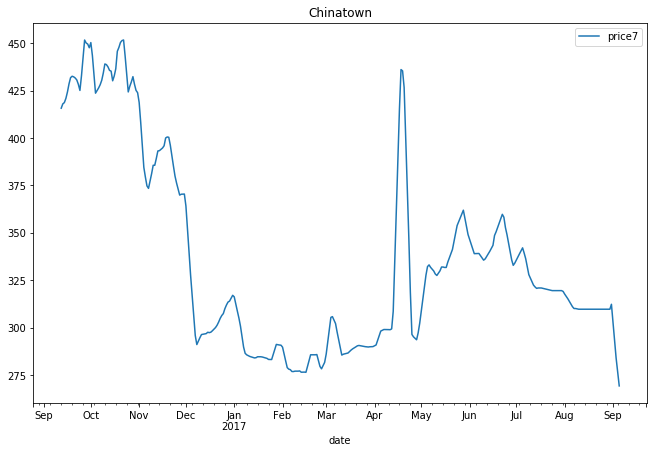

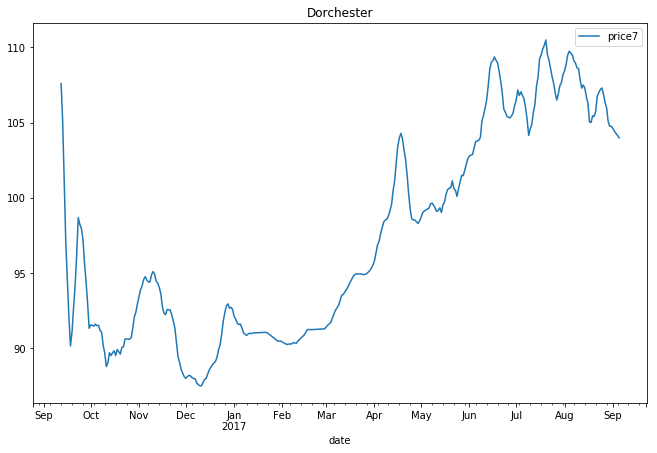

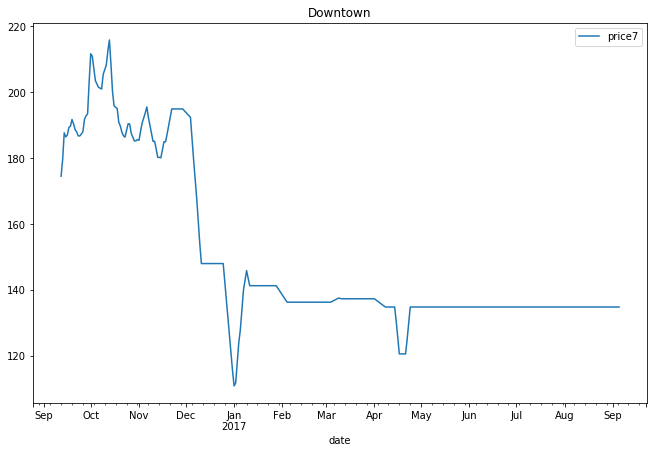

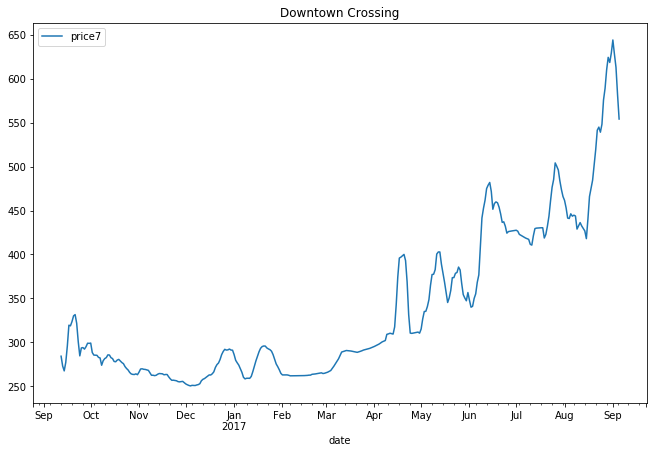

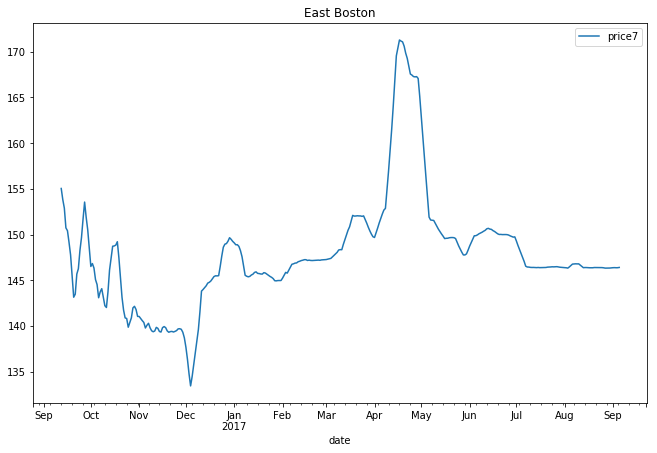

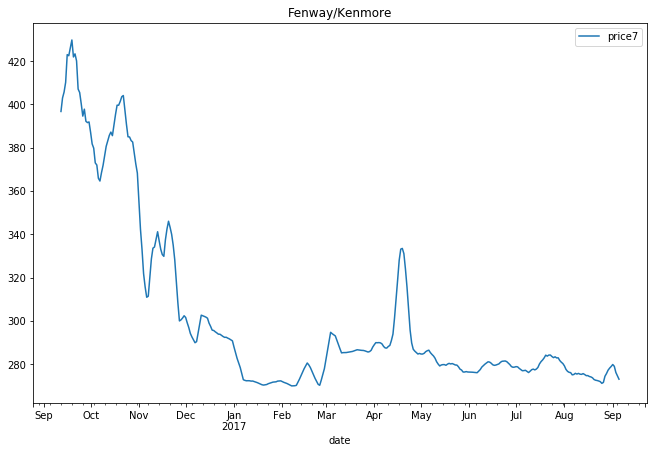

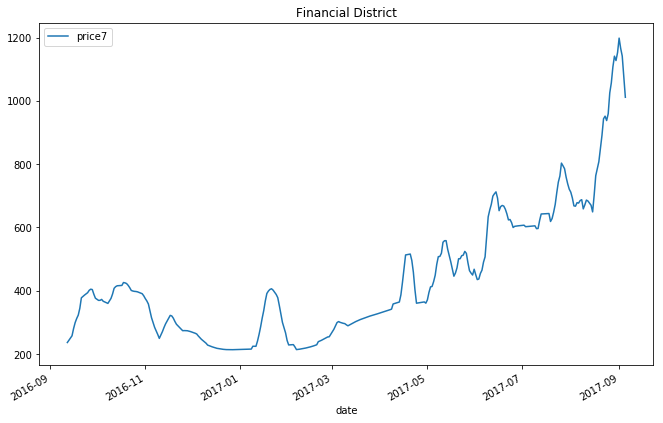

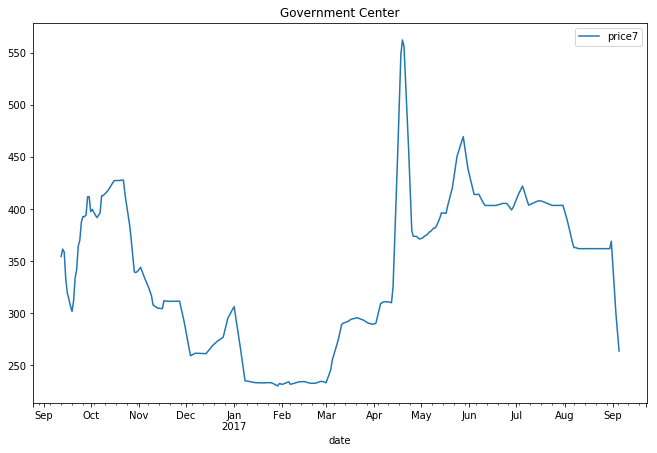

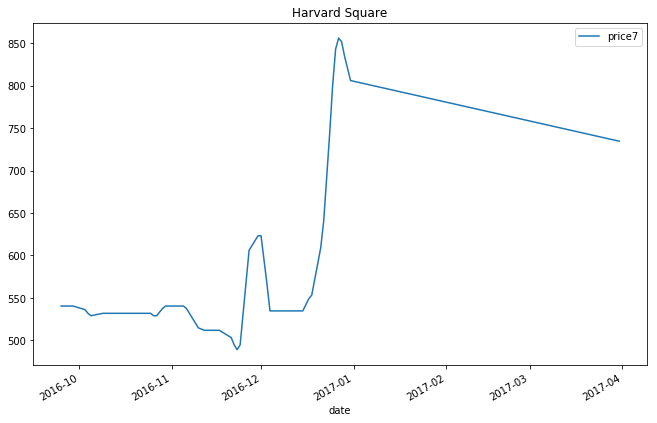

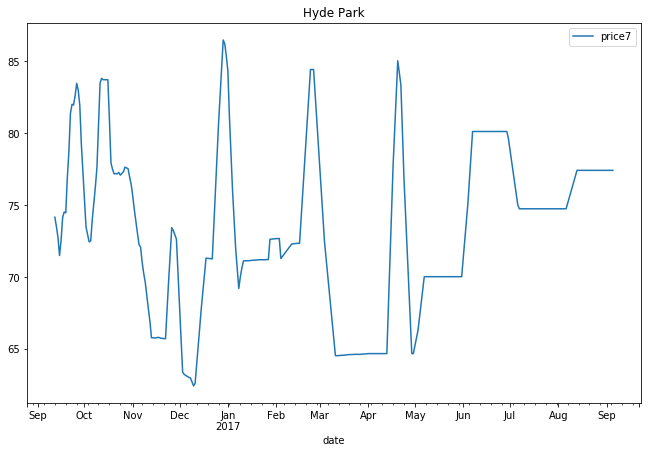

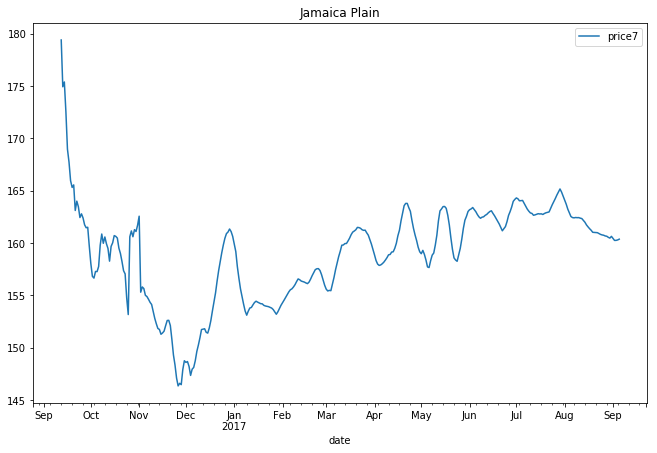

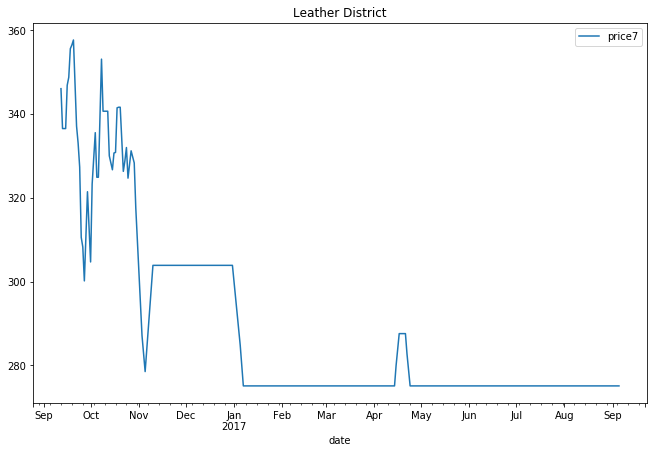

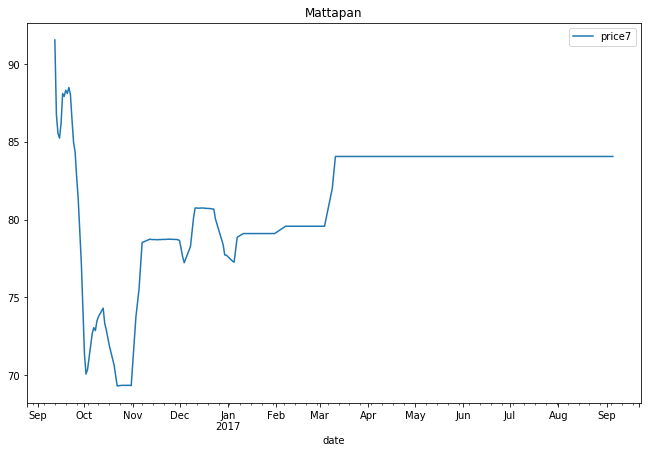

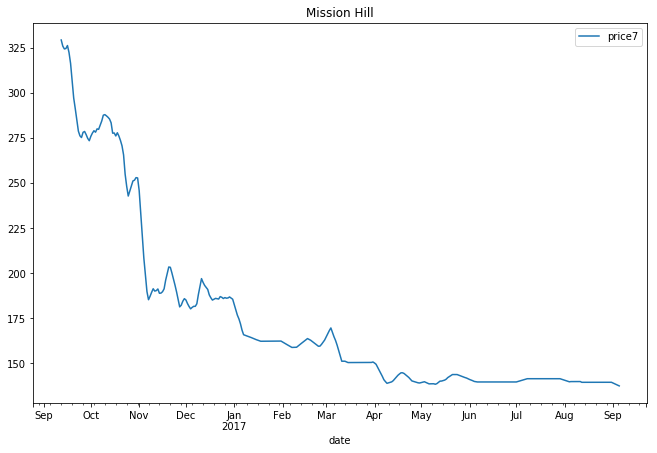

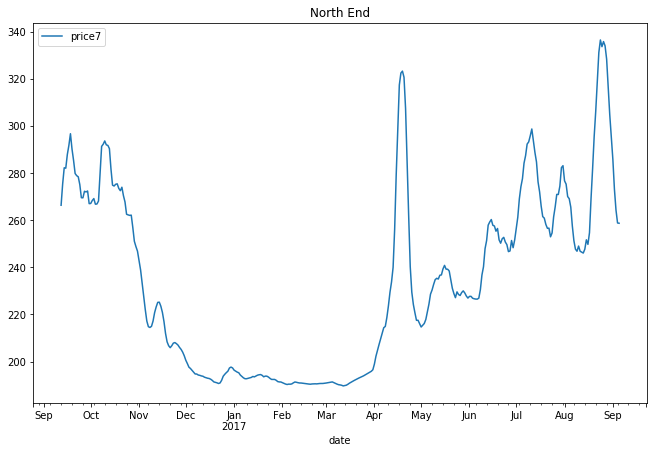

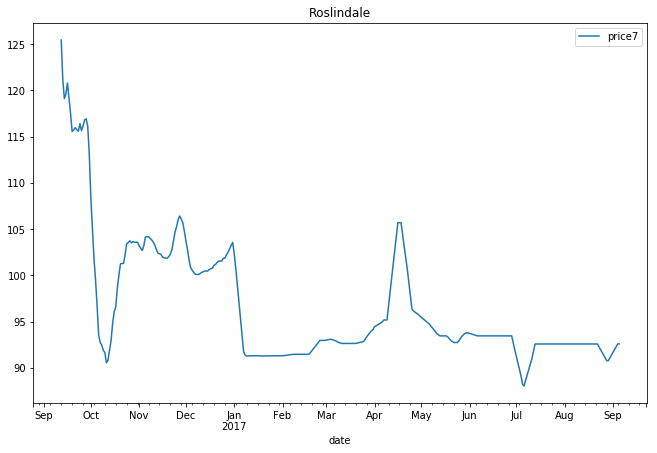

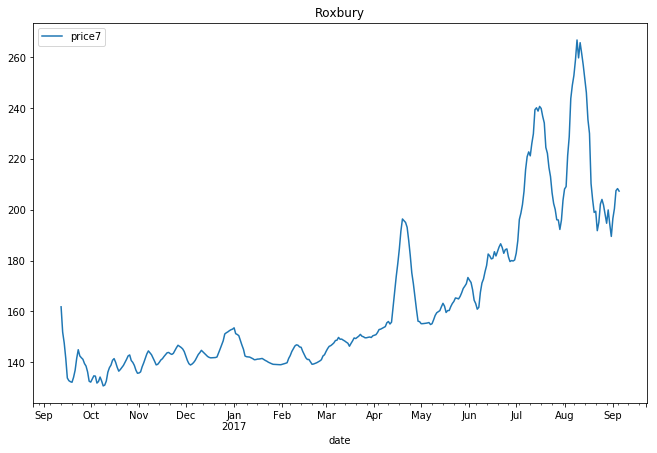

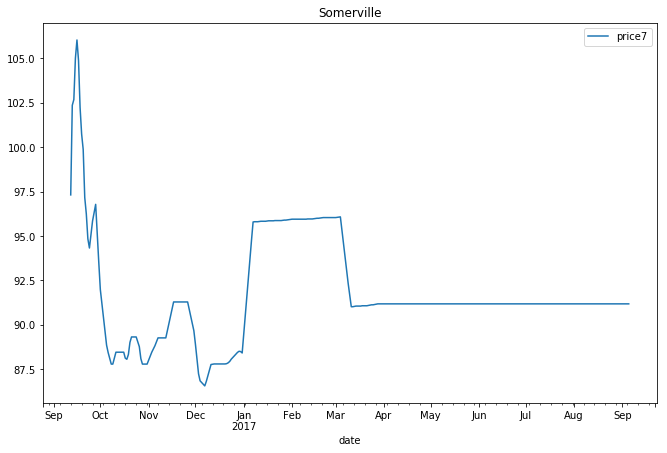

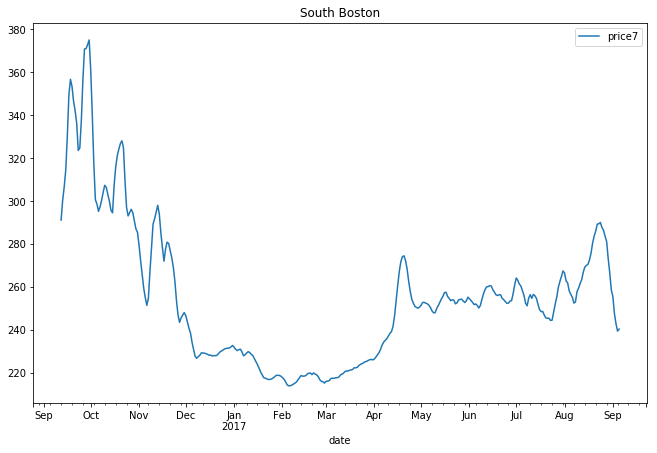

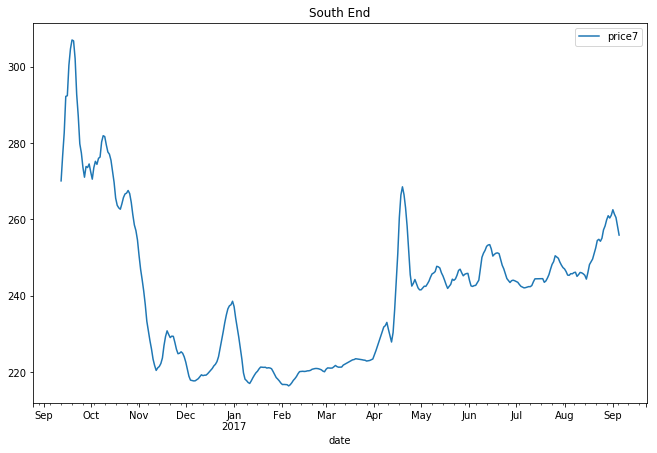

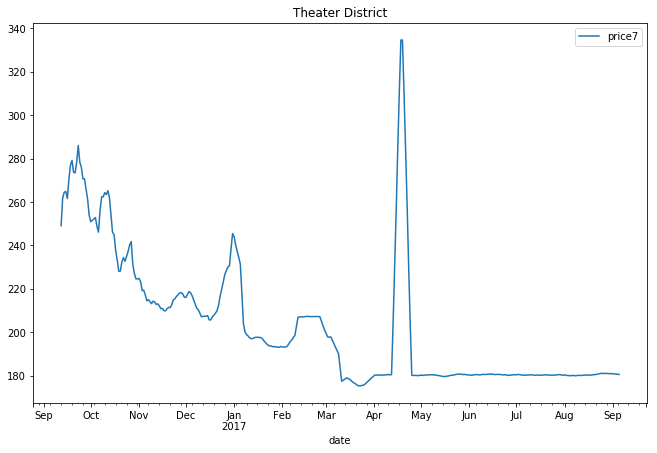

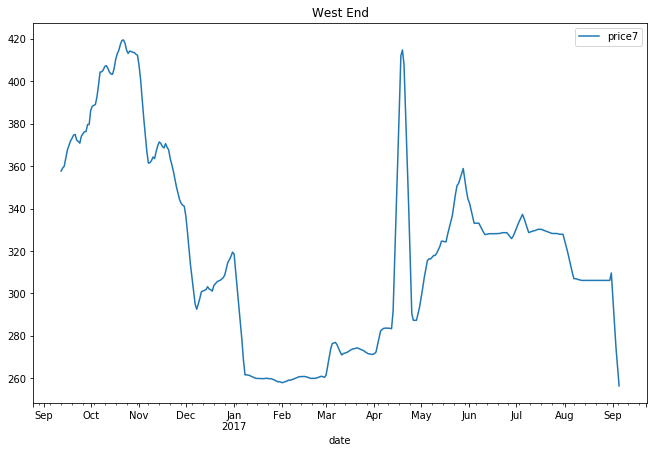

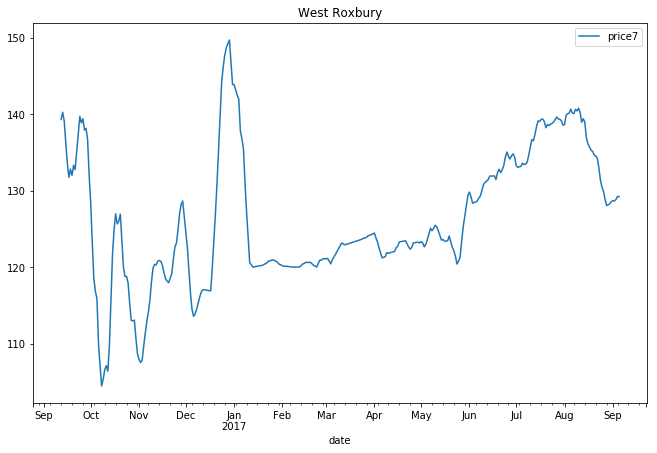

In [277]:
for place in hoods:
    df_place = df[df.neighbourhood == place]
    df_place['price7'] = df_place.price.rolling(window = 7, center = False).mean()
    df_place.plot('date', 'price7', kind = 'line', figsize = (11, 7))
    plt.title(place)

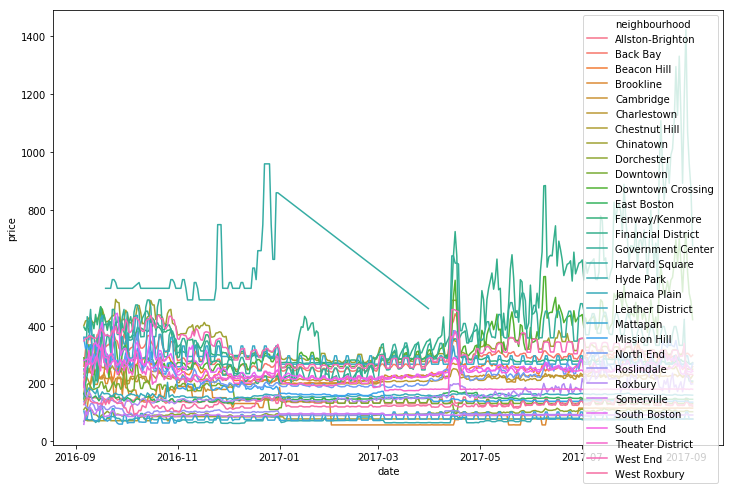

In [272]:
plt.figure(figsize = (12,8))
sns.lineplot(data = df, x = 'date', y = 'price', hue = 'neighbourhood', estimator = None);

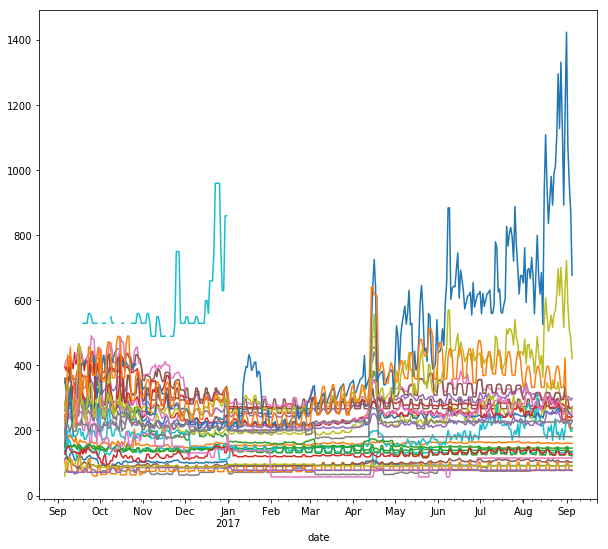

In [217]:
for place in listings.neighbourhood.unique().tolist():
    try:
        jamaica_list = listings[listings.neighbourhood == place].id.tolist()
        calendar[calendar.listing_id.isin(jamaica_list)].groupby('date').price_num2.mean().plot(kind = 'line', figsize = (10, 9));
    except: AttributeError
        
#plt.legend();

In [197]:
calendar.shape

(1308890, 9)

In [208]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [198]:
3585 * 365

1308525

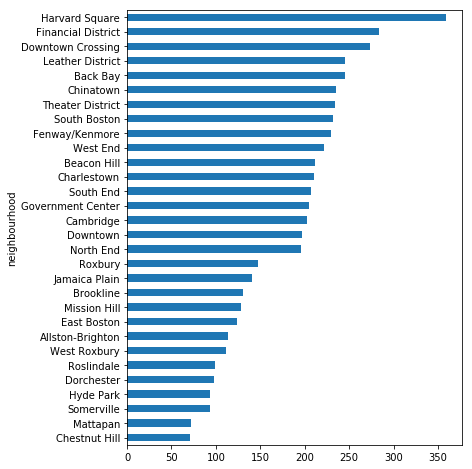

In [196]:
listings.groupby('neighbourhood').price.mean().sort_values().plot(kind = 'barh', color = base_color, figsize = (6, 8));

In [194]:
listings['price'] = listings.price.str.replace(',', '').str[1:].astype('float')

In [ ]:
listings.groupby(['neighbourhood', '']).id.size()

In [182]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [185]:
listings[['calendar_last_scraped', 'last_scraped']].head()

,calendar_last_scraped,last_scraped
0,2016-09-06,2016-09-07
1,2016-09-06,2016-09-07
2,2016-09-06,2016-09-07
3,2016-09-06,2016-09-07
4,2016-09-06,2016-09-07


In [186]:
listings.shape

(3585, 95)

In [149]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 7 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
price_num     643037 non-null object
price2        643037 non-null object
price_num2    643037 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 69.9+ MB


In [150]:
calendar['date2'] = pd.to_datetime(calendar['date'])

In [156]:
calendar['dayname'] = calendar.date2.dt.day_name()

In [162]:
calendar.groupby('dayname').price_num2.mean()

dayname
Friday       203.121167
Monday       195.809561
Saturday     203.408387
Sunday       198.219764
Thursday     198.073112
Tuesday      195.173842
Wednesday    195.418228
Name: price_num2, dtype: float64

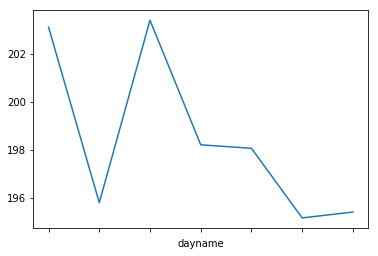

In [158]:
calendar.groupby('dayname').price_num2.mean().plot(kind = 'line');

In [152]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 8 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
price_num     643037 non-null object
price2        643037 non-null object
price_num2    643037 non-null float64
date2         1308890 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 79.9+ MB


In [119]:
import numpy as np

In [129]:
calendar['price2'] = calendar.price.str.replace(',', '')

In [131]:
calendar['price_num'] = calendar.price2.str[1:]

In [132]:
calendar['price_num2'] = pd.to_numeric(calendar['price_num'], errors = 'raise')

In [108]:
calendar.date.max()

'2017-09-05'

In [106]:
listings[listings.id == 12147973]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


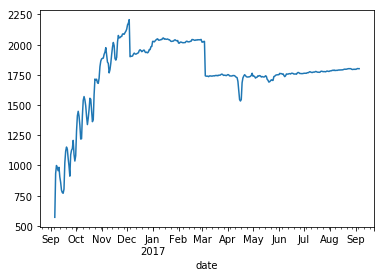

In [279]:
calendar[calendar.available == True].groupby('date').listing_id.count().plot(kind = 'line');

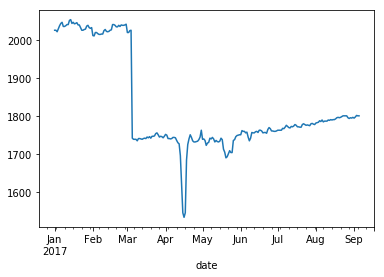

In [281]:
calendar[(calendar.date.dt.year >= 2017) & (calendar.available == True )].groupby('date').listing_id.count().plot(kind = 'line');

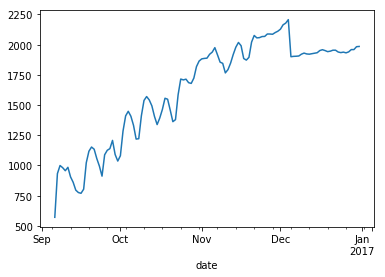

In [283]:
calendar[(calendar.date.dt.year == 2016) & (calendar.available == True)].groupby('date').listing_id.count().plot(kind = 'line');

In [6]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [76]:
listings.reviews_per_month.head()

0     NaN
1    1.30
2    0.47
3    1.00
4    2.25
Name: reviews_per_month, dtype: float64

Inspiration

Can you describe the vibe of each Boston neighborhood using listing descriptions?

What are the busiest times of the year to visit Boston? By how much do prices spike?

Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Boston?

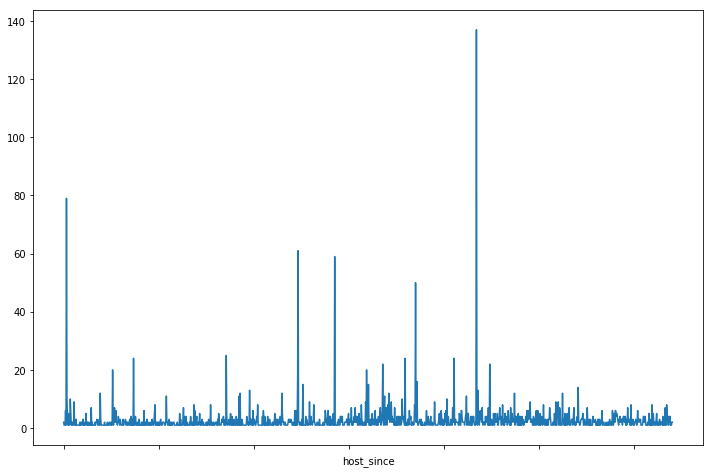

In [83]:
listings.groupby('host_since').id.count().plot(kind = 'line', figsize = (12, 8));

In [286]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [288]:
rev.shape

(68275, 6)

In [287]:
listings[listings.id == 1178162]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1559,1178162,https://www.airbnb.com/rooms/1178162,20160906204935,2016-09-07,Private Room Great Location Boston,NaN,Great Boston Location conveniently located nea...,Great Boston Location conveniently located nea...,none,NaN,...,9.0,f,NaN,NaN,f,strict,f,f,4,5.35


In [289]:
rev.id.nunique() # id is actually review id

68275

In [293]:
rev2 = pd.merge(left = rev, right = listings[['id', 'neighbourhood']], left_on = 'listing_id', right_on = 'id', how = 'left')

In [326]:
rev2.groupby('neighbourhood').comments.size()

neighbourhood
Allston-Brighton      5156
Back Bay              4378
Beacon Hill           3494
Brookline                6
Cambridge               39
Charlestown           1898
Chestnut Hill            2
Chinatown              651
Dorchester            6462
Downtown                91
Downtown Crossing      954
East Boston           4636
Fenway/Kenmore        2786
Financial District      56
Government Center       52
Hyde Park              267
Jamaica Plain         8644
Leather District       106
Mattapan               148
Mission Hill          1333
North End             4099
Roslindale            1304
Roxbury               3236
Somerville              25
South Boston          4253
South End             5150
Theater District       605
West End               268
West Roxbury           672
Name: comments, dtype: int64

In [310]:
!pip install wordcloud

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [311]:
from wordcloud import WordCloud, STOPWORDS

In [307]:
chinatown = rev2[rev2.neighbourhood == 'Chinatown'].comments.reset_index(drop = True)

In [341]:
chinatown.head()

0    The host canceled this reservation 4 days befo...
1    Overall, a great room in a comfortable apartme...
2    Beautiful apartment.  Very comfortable!  Host ...
3    Amazing, high rise unit with city views and al...
4    Great location and great unit. The check-in pr...
Name: comments, dtype: object

In [332]:
text_chinatown = ' '.join(review for review in chinatown)

In [333]:
len(text_chinatown)

213005

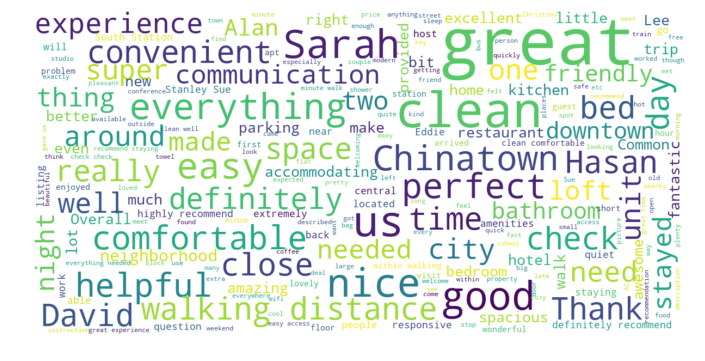

In [343]:
stopwords = set(STOPWORDS)
stopwords.update(['apartment', 'location', 'area', 'room', 'Boston', 'stay', 'building', 'house', 'host', 'place'])
wordcloud = WordCloud(stopwords = stopwords,
                     background_color = 'white',
                     max_font_size = 40,
                     scale = 3,
                     random_state = 42,
                     max_words = 300).generate(text_chinatown)
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

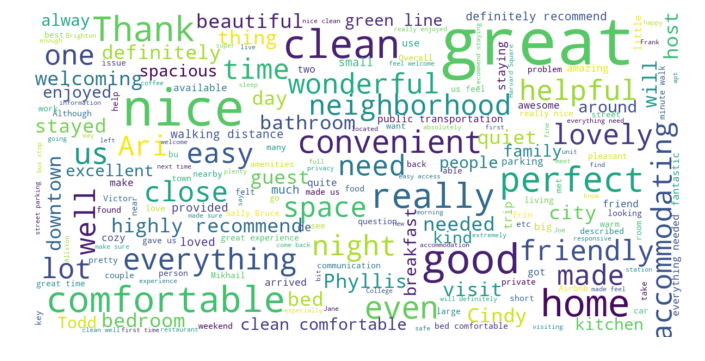

In [344]:
text_allston = ' '.join(review for review in rev2[rev2.neighbourhood == 'Allston-Brighton'].comments.reset_index(drop = True).dropna())
wordcloud = WordCloud(stopwords = stopwords,
                     background_color = 'white',
                     max_font_size = 40,
                     scale = 3,
                     random_state = 42,
                     max_words = 300).generate(text_allston)
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

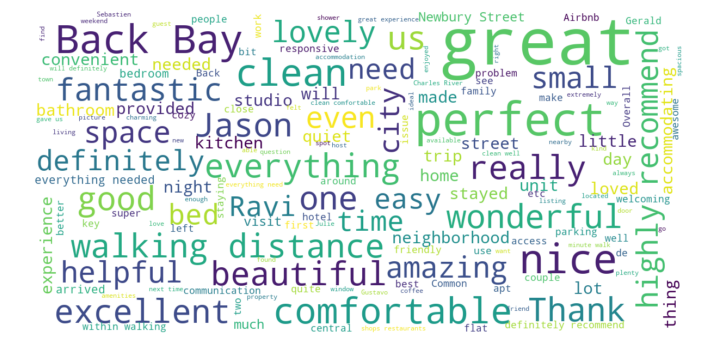

In [345]:
text_backbay = ' '.join(review for review in rev2[rev2.neighbourhood == 'Back Bay'].comments.reset_index(drop = True).dropna())
wordcloud = WordCloud(stopwords = stopwords,
                     background_color = 'white',
                     max_font_size = 40,
                     scale = 3,
                     random_state = 42,
                     max_words = 300).generate(text_backbay)
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

In [347]:
from PIL import Image

In [349]:
boston_mask = np.array(Image.open('Boston.png'))

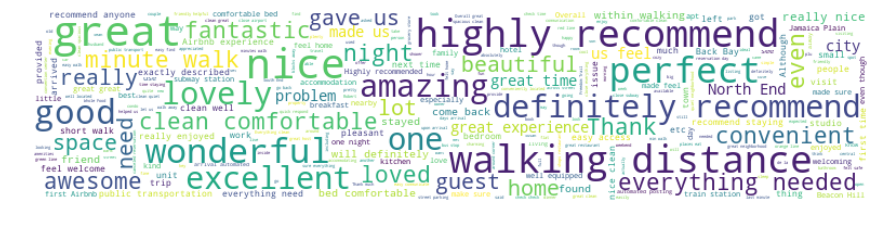

In [388]:
text_boston = ' '.join(review for review in rev2.comments.dropna())
wordcloud = WordCloud(stopwords = stopwords,
                     background_color = 'white',
                     max_font_size = 40,
                     #scale = 3,
                     random_state = 42,
                     max_words = 1000,
                     mask = boston_mask,
                     contour_width=3, 
                     contour_color='steelblue').generate(text_boston)

plt.figure(figsize = (15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

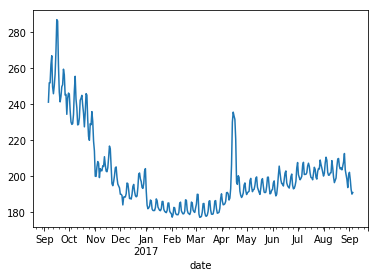

In [371]:
calendar.groupby('date').price.mean().plot(kind = 'line');

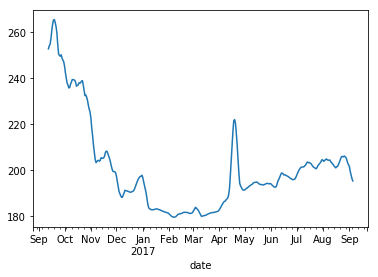

In [372]:
calendar.groupby('date').price.mean().rolling(window= 7, center = False).mean().plot(kind = 'line');

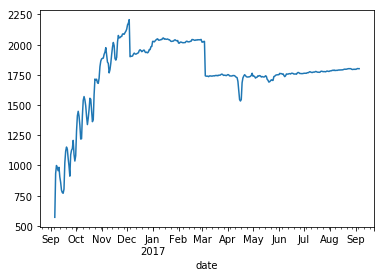

In [375]:
calendar[calendar.available == True].groupby('date').price.count().plot(kind = 'line');

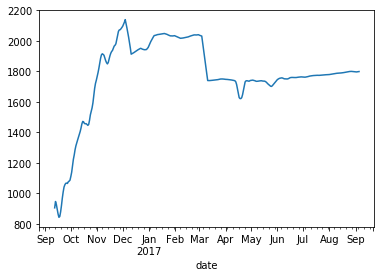

In [376]:
calendar[calendar.available == True].groupby('date').price.count().rolling(window= 7, center = False).mean().plot(kind = 'line');

In [382]:
listings['host_since'] = pd.to_datetime(listings['host_since'])

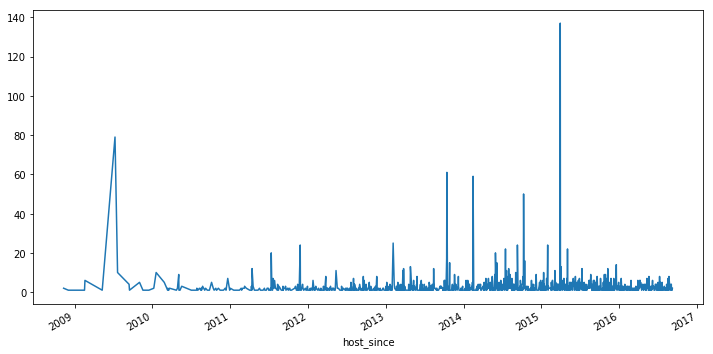

In [386]:
# any upward trend in number of listings
plt.figure(figsize = (12, 6))
listings.groupby('host_since').id.size().plot(kind = 'line');

In [392]:
rev2['date'] = pd.to_datetime(rev2['date'])

In [1]:
plt.figure(figsize = (9, 6))
rev2.groupby('date').comments.size().plot(kind = 'line');

NameError: name 'plt' is not defined

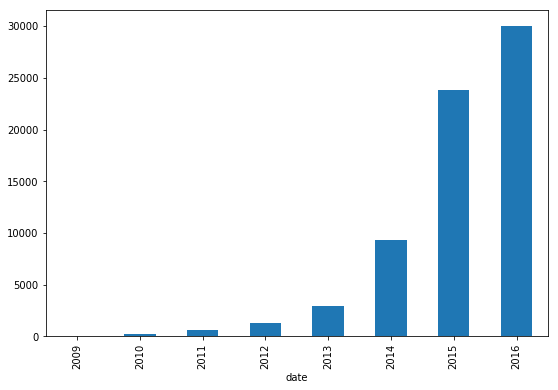

In [401]:
plt.figure(figsize = (9, 6))
rev2.groupby(rev2.date.dt.year).comments.size().plot(kind = 'bar', color = base_color);

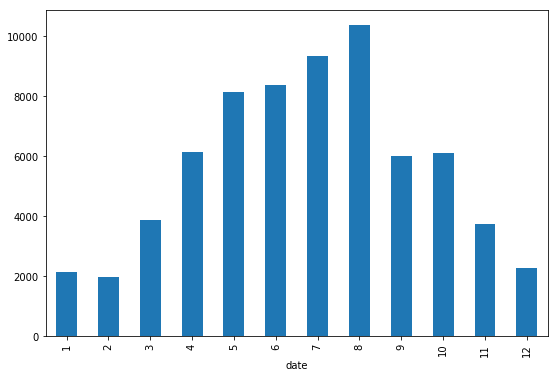

In [402]:
plt.figure(figsize = (9, 6))
rev2.groupby(rev2.date.dt.month).comments.size().plot(kind = 'bar', color = base_color);